In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.


In [2]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [3]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [4]:
df_columns=df.columns

columns_list = []
for i in df_columns:
    columns_list.append(i)

columns_list.remove('Date')
columns_list.remove('Year')
columns_list.remove('Home Team')
columns_list.remove('Away Team')

In [5]:
Prediction_Variable = df['Home Score_x_x']
Home_High_Corr_Values = []

In [6]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : -0.2817165149397738
Away Team Ranking_x : 0.22624375527955604
Home Team Spread_x : -0.4705450569905664
Away Team Spread_x : 0.4705450569905664
Total_x : 0.32232809848724636
Home Score_x_x : 0.9999999999999999
Away Score_x_x : -0.0651530057208107
Rolling 5 Past Away Score : -0.10797820700921759
Rolling 5 Past Away Score Avg : -0.1079782070092176
Rolling 5 Past Away Score Max : -0.056255798418219996
Rolling 5 Past Away Score Min : -0.08960629256777503
Rolling 3 Past Away Score : -0.09416260693057878
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279305
Rolling 3 Past Away Score Min : -0.074533568274825
Past Away Score : -0.07097380100304569
Rolling 5 Past Away HI Pass yrds : 0.0673047604788178
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881784
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874467
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601066
Rolling 3 Past Away HI Pass yrds : 0.082241986

Rolling 5 Past Away Completion % : -0.06177645460142733
Rolling 5 Past Away Completion % Avg : -0.06177645460142733
Rolling 5 Past Away Completion % Max : -0.07720564497110245
Rolling 5 Past Away Completion % Min : -0.06031979307216996
Rolling 3 Past Away Completion % : -0.04445362076322833
Rolling 3 Past Away Completion % Avg : -0.044453620763228174
Rolling 3 Past Away Completion % Max : -0.017094088043737535
Rolling 3 Past Away Completion % Min : -0.06045781959031687
Previous Away Completion % : -0.06014809598286205
Rolling 5 Past Away Total Yards : -0.014917542566106215
Rolling 5 Past Away Total Yards Avg : -0.014917542566106211
Rolling 5 Past Away Total Yards Max : 0.00769032975201182
Rolling 5 Past Away Total Yards Min : -0.010320380930277684
Rolling 3 Past Away Total Yards : -0.005764940624395601
Rolling 3 Past Away Total Yards Avg : -0.005764940624395585
Rolling 3 Past Away Total Yards Max : 0.022761903218058176
Rolling 3 Past Away Total Yards Min : -0.011763013976520036
Previou

Rolling 5 Past Away Push Odds Avg : -0.06782492263522709
Rolling 5 Past Away Push Odds Max : -0.06782492263522713
Rolling 5 Past Away Push Odds Min : nan
Rolling 3 Past Away Push Odds : -0.07224724641797824
Rolling 3 Past Away Push Oddss Avg : -0.07224724641797821
Rolling 3 Past Away Push OddsMax : -0.07224724641797824
Rolling 3 Past Away Push Odds Min : nan
Previous Away Push Odds : -0.014455803401996243
Rolling 5 Past Away Total Odds : 0.14737665873006114
Rolling 5 Past Away Total Odds Avg : 0.1473766587300612
Rolling 5 Past Away Total Odds Max : 0.1335890053513359
Rolling 5 Past Away Total Odds Min : 0.12260817260887659
Rolling 3 Past Away Total Odds : 0.14916677371155723
Rolling 3 Past Away Total Oddss Avg : 0.14916677371155712
Rolling 3 Past Away Total OddsMax : 0.1332644656304304
Rolling 3 Past Away Total Odds Min : 0.11587952845241031
Previous Away Total Odds : 0.11231587017287421
Rolling 5 Past Home Score : 0.2678243319580509
Rolling 5 Past Home Score Avg : 0.2678243319580508
R

Rolling 3 Past Home Penalties Max : 0.09661840676289302
Rolling 3 Past Home Penalties Min : 0.04195834998540956
Previous Home Penalties : 0.07034654984213964
Rolling 5 Past Home Penalty Yards : 0.08542385900466358
Rolling 5 Past Home Penalty Yards Avg : 0.08542385900466364
Rolling 5 Past Home Penalty Yards Max : 0.06376268787105648
Rolling 5 Past Home Penalty Yards Min : 0.0366572090694084
Rolling 3 Past Home Penalty Yards : 0.09175550995113552
Rolling 3 Past Home Penalty Yards Avg : 0.09175550995113554
Rolling 3 Past Home Penalty Yards Max : 0.0933670811112964
Rolling 3 Past Home Penalty Yards Min : 0.03874205604403179
Previous Home Penalty Yards : 0.08127610045001991
Rolling 5 Past Home Yards per Penalty : 0.07430286444884783
Rolling 5 Past Home Yards per Penalty Avg : 0.07430286444884777
Rolling 5 Past Home Yards per Penalty Max : 0.0639087629526808
Rolling 5 Past Home Yards per Penalty Min : 0.035663666112612534
Rolling 3 Past Home Yards per Penalty : 0.0760684182837894
Rolling 3 P

Rolling 3 Past H&A Season T Wins_Home_Team : 0.22822174062946127
Rolling 3 Past H&A Season T Wins Avg_Home_Team : 0.2282217406294614
Rolling 3 Past H&A Season T Wins Max_Home_Team : 0.2378368543765022
Rolling 3 Past H&A Season T Wins Min_Home_Team : 0.1544396626018401
Previous H&A Season T Wins_Home_Team : 0.18645601540645432
Rolling 5 Past H&A Season T Losses_Home_Team : -0.2931468646265042
Rolling 5 Past H&A Season T Losses Avg_Home_Team : -0.2931468646265041
Rolling 5 Past H&A Season T Losses Max_Home_Team : -0.2928694431188028
Rolling 5 Past H&A Season T Losses Min_Home_Team : -0.2138013979121169
Rolling 3 Past H&A Season T Losses_Home_Team : -0.2752515599443288
Rolling 3 Past H&A Season T Losses Avg_Home_Team : -0.27525155994432876
Rolling 3 Past H&A Season T Losses Max_Home_Team : -0.2806529620841785
Rolling 3 Past H&A Season T Losses Min_Home_Team : -0.21117812759378338
Previous H&A Season Losses_Home_Team : -0.23780425682228204
Rolling 5 Past H&A Conf T Wins_Home_Team : 0.27600

Rolling 3 Past H&A Turnovers Min_Home_Team : -0.07359555491306245
Previous H&A Turnovers_Home_Team : -0.10678405240978812
Rolling 5 Past H&A Fumbles Lost_Home_Team : -0.021063471118402365
Rolling 5 Past H&A Fumbles Lost Avg_Home_Team : -0.021063471118402424
Rolling 5 Past H&A Fumbles Lost Max_Home_Team : -0.02622525032744808
Rolling 5 Past H&A Fumbles Lost Min_Home_Team : -0.02047901452059591
Rolling 3 Past H&A Fumbles Lost_Home_Team : -0.027657050716199703
Rolling 3 Past H&A Fumbles Lost Avg_Home_Team : -0.02765705071619965
Rolling 3 Past H&A Fumbles Lost Max_Home_Team : -0.03617177344538622
Rolling 3 Past H&A Fumbles Lost Min_Home_Team : -0.04494961396888998
Previous H&A Fumbles Lost_Home_Team : -0.037313557827562634
Rolling 5 Past H&A Interceptions Thrown_Home_Team : -0.14418810166016902
Rolling 5 Past H&A Interceptions Thrown Avg_Home_Team : -0.14418810166016893
Rolling 5 Past H&A Interceptions Thrown Max_Home_Team : -0.10172590642530122
Rolling 5 Past H&A Interceptions Thrown Min_

Rolling 3 Past H&A Season T Losses Min_Away_Team : 0.18819050598292425
Previous H&A Season Losses_Away_Team : 0.1989714606505929
Rolling 5 Past H&A Conf T Wins_Away_Team : -0.23307753629068134
Rolling 5 Past H&A Conf T Wins Avg_Away_Team : -0.23307753629068143
Rolling 5 Past H&A Conf T Wins Max_Away_Team : -0.23118976935877536
Rolling 5 Past H&A Conf T Wins Min_Away_Team : -0.15552410823014998
Rolling 3 Past H&A Conf T Wins_Away_Team : -0.20914836372293816
Rolling 3 Past H&A Conf T Wins Avg_Away_Team : -0.20914836372293827
Rolling 3 Past H&A Conf T Wins Max_Away_Team : -0.2130780573996949
Rolling 3 Past H&A Conf T Wins Min_Away_Team : -0.15590826880229938
Previous H&A Conf Wins_Away_Team : -0.18667769437535991
Rolling 5 Past H&A Conf T Losses_Away_Team : 0.2482783972063846
Rolling 5 Past H&A Conf T Losses Avg_Away_Team : 0.24827839720638453
Rolling 5 Past H&A Conf T Losses Max_Away_Team : 0.24076177293861706
Rolling 5 Past H&A Conf T Losses Min_Away_Team : 0.1562927109222814
Rolling 3 

Rolling 3 Past H&A Passing Max_Away_Team : 0.03829466476858402
Rolling 3 Past H&A Passing Min_Away_Team : 0.0371042283410311
Previous H&A Passing_Away_Team : 0.025202778894241135
Rolling 5 Past H&A Yards per Pass_Away_Team : -0.08239669366734104
Rolling 5 Past H&A Yards per Pass Avg_Away_Team : -0.08239669366734108
Rolling 5 Past H&A Yards per Pass Max_Away_Team : -0.1001456754940332
Rolling 5 Past H&A Yards per Pass Min_Away_Team : -0.03066752511516375
Rolling 3 Past H&A Yards per Pass_Away_Team : -0.07717557341116424
Rolling 3 Past H&A Yards per Pass Avg_Away_Team : -0.07717557341116427
Rolling 3 Past H&A Yards per Pass Max_Away_Team : -0.0907838899911661
Rolling 3 Past H&A Yards per Pass Min_Away_Team : -0.0427124030666935
Previous H&A Yards per Pass_Away_Team : -0.06462010674590042
Rolling 5 Past H&A Rushing_Away_Team : -0.10323050788265989
Rolling 5 Past H&A Rushing Avg_Away_Team : -0.10323050788265989
Rolling 5 Past H&A Rushing Max_Away_Team : -0.03605052886172689
Rolling 5 Past 

In [7]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [8]:
#for i in Home_High_Corr_Values:
  #  plt.scatter(df[i],df['Home Score_x_x'])
   # plt.xlabel(i)
   # plt.ylabel('Home Score')
   # plt.title(i + " "+'Correlation')
   # plt.show()
   # print(i,":", df[i].corr(df['Home Score_x_x']) )

In [9]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [10]:
df2 = df.dropna()
Home_High_Corr_Values.remove('Home Score_x_x')

In [11]:
X = df2[Home_High_Corr_Values]
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df2["Home Score_x_x"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [12]:
print(X_train.shape,X_test.shape)

(652, 15) (218, 15)


In [13]:
print(y_train.shape,y_test.shape)

(652,) (218,)


In [14]:
rModel3 = sm.OLS(y_train, X_train)

In [15]:
rModel3_results = rModel3.fit()

In [16]:
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Home Score_x_x   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     40.13
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           6.05e-52
Time:                        16:45:19   Log-Likelihood:                -2475.2
No. Observations:                 652   AIC:                             4968.
Df Residuals:                     643   BIC:                             5009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -3.8131      3.558     -1.072      0.284     -10.799       3.173
Home Team Spread_x                                 -0.2237      0.019    -11.493      0.000      -0.262      -0.186
Away Team Spread_x                                  0.2237      0.019     11.493      0.000       0.186       0.262
Total_x                                             0.4345      0.062      7.055      0.000       0.314       0.555
Rolling 5 Past H&A Score_Home_Team                 -0.0247      0.023     -1.077      0.282      -0.070       0.020
Rolling 5 Past H&A Score Avg_Home_Team             -0.0049      0.005     -1.077      0.282      -0.014       0.004
Rolling 5 Past H&A 1st Downs_Home_Team              0.0413      0.055      0.751      0.453      -0.067       0.149
Rolling 5 Past H&A 1st Downs Avg_Home_Team          0.0083      0.011      0.751      0.453      -0.013       0.030
Rolling 5 Past H&A Total Yards_Home_Team            0.0014      0.003      0.429      0.668      -0.005       0.008
Rolling 5 Past H&A Total Yards Avg_Home_Team        0.0003      0.001      0.429      0.668      -0.001       0.002
Rolling 5 Past H&A Yards per Pass_Home_Team         0.0651      0.092      0.708      0.479      -0.116       0.246
Rolling 5 Past H&A Yards per Pass Avg_Home_Team     0.0130      0.018      0.708      0.479      -0.023       0.049
Rolling 5 Past H&A Spread_Home_Team                 0.0107      0.021      0.498      0.619      -0.031       0.053
Rolling 5 Past H&A Spread Avg_Home_Team             0.0021      0.004      0.498      0.619      -0.006       0.011
Rolling 5 Past H&A Spread Min_Home_Team            -0.1163      0.086     -1.360      0.174      -0.284       0.052
==============================================================================
Omnibus:                        7.412   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.601
Skew:                           0.185   Prob(JB):                       0.0369
Kurtosis:                       2.674   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
y_pred = rModel3_results.predict(X_test)

Text(0, 0.5, 'predictions')

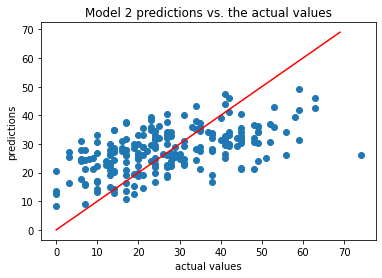

In [18]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test,y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,70)],[x for x in range(0,70)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel ("actual values")
plt.ylabel("predictions")

# Random Forest

In [19]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics

In [20]:
df2['H/A Winner'] = df2.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)

<ipython-input-20-11fcd299100a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['H/A Winner'] = df2.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)


In [21]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [22]:
df2['Total Points'] = df2['Home Score_x_x'] + df2['Away Score_x_x']
df2['Actual Score Over/Under'] = df2['Total Points'] - df2['Total_x']
df2['Over/Under'] = df2.apply(lambda x: 1 if x['Actual Score Over/Under'] > 0 else (2 if x['Actual Score Over/Under'] < 1 else 0),axis=1)
                             
                             

<ipython-input-22-3536dbf44b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Points'] = df2['Home Score_x_x'] + df2['Away Score_x_x']
<ipython-input-22-3536dbf44b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Actual Score Over/Under'] = df2['Total Points'] - df2['Total_x']
<ipython-input-22-3536dbf44b97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [23]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [24]:


Home_High_Corr_Values.append('Over/Under')


In [25]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under']

In [26]:
df3 = df2[Home_High_Corr_Values]

In [27]:
X = df3.drop('Over/Under',axis=1).values
y = df3['Over/Under'].values

In [28]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': [100,200,300,400],
              'max_depth': [1,3,5,7],
              'criterion': ['gini','entropy'],
    
}



In [29]:
model = model_selection.GridSearchCV(
estimator = classifier,
param_grid = param_grid,
scoring = 'accuracy',
n_jobs = 1,
cv=5
)

In [30]:
model.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [31]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5436781609195402
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Random Grid Seach - Over/Under

In [32]:
X = df3.drop('Over/Under',axis=1).values
y = df3['Over/Under'].values

In [33]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': np.arange(100,1500,100),
              'max_depth': np.arange(1,20,1),
              'criterion': ['gini','entropy'],
    
}


In [34]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [35]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=12, n_estimators=1300............
[CV 1/5; 1/10] END criterion=gini, max_depth=12, n_estimators=1300; total time=   2.5s
[CV 2/5; 1/10] START criterion=gini, max_depth=12, n_estimators=1300............
[CV 2/5; 1/10] END criterion=gini, max_depth=12, n_estimators=1300; total time=   2.4s
[CV 3/5; 1/10] START criterion=gini, max_depth=12, n_estimators=1300............
[CV 3/5; 1/10] END criterion=gini, max_depth=12, n_estimators=1300; total time=   2.4s
[CV 4/5; 1/10] START criterion=gini, max_depth=12, n_estimators=1300............
[CV 4/5; 1/10] END criterion=gini, max_depth=12, n_estimators=1300; total time=   2.9s
[CV 5/5; 1/10] START criterion=gini, max_depth=12, n_estimators=1300............
[CV 5/5; 1/10] END criterion=gini, max_depth=12, n_estimators=1300; total time=   2.4s
[CV 1/5; 2/10] START criterion=gini, max_depth=2, n_estimators=800..............
[CV 1/5; 2/10] END

[CV 5/5; 10/10] END criterion=entropy, max_depth=15, n_estimators=100; total time=   0.2s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [36]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5517241379310345
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Scaled data

In [37]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import pipeline

In [38]:
scl = preprocessing.StandardScaler()
pca = decomposition.PCA()
rf = ensemble.RandomForestClassifier(n_jobs=-1)

In [39]:
classifier = pipeline.Pipeline(
    [
        ("scaling", scl),
        ("pca", pca),
        ("rf",rf)
    ]
)

In [40]:

param_grid = { 'pca__n_components': np.arange(5,10),
              'rf__n_estimators': np.arange(100,1500,100),
              'rf__max_depth': np.arange(1,20,1),
              'rf__criterion': ['gini','entropy'],
    
}


In [41]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [42]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100
[CV 1/5; 1/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100; total time=   2.3s
[CV 2/5; 1/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100
[CV 2/5; 1/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100; total time=   2.2s
[CV 3/5; 1/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100
[CV 3/5; 1/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100; total time=   2.2s
[CV 4/5; 1/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100
[CV 4/5; 1/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=16, rf__n_estimators=1100; total time=   2.2s
[CV 5/5; 1/10] START pca__n_components=9, rf__crite

[CV 3/5; 8/10] END pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=500; total time=   1.1s
[CV 4/5; 8/10] START pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=500
[CV 4/5; 8/10] END pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=500; total time=   1.1s
[CV 5/5; 8/10] START pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=500
[CV 5/5; 8/10] END pca__n_components=5, rf__criterion=entropy, rf__max_depth=18, rf__n_estimators=500; total time=   1.1s
[CV 1/5; 9/10] START pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=500
[CV 1/5; 9/10] END pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=500; total time=   0.8s
[CV 2/5; 9/10] START pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=500
[CV 2/5; 9/10] END pca__n_components=5, rf__criterion=entropy, rf__max_depth=1, rf__n_estimators=50

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1))]),
                   n_jobs=1,
                   param_distributions={'pca__n_components': array([5, 6, 7, 8, 9]),
                                        'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'rf__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [43]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5333333333333333
{'memory': None, 'steps': [('scaling', StandardScaler()), ('pca', PCA(n_components=5)), ('rf', RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=500,
                       n_jobs=-1))], 'verbose': False, 'scaling': StandardScaler(), 'pca': PCA(n_components=5), 'rf': RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=500,
                       n_jobs=-1), 'scaling__copy': True, 'scaling__with_mean': True, 'scaling__with_std': True, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'entropy', 'rf__max_depth': 1, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_impurity_split': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__min_weight_f

# RF Home/Away Winner

In [44]:
Prediction_Variable = df['Away Score_x_x']


for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : 0.23709573530568462
Away Team Ranking_x : -0.27414898272945826
Home Team Spread_x : 0.5266032684250008
Away Team Spread_x : -0.5266032684250008
Total_x : 0.28311043106396566
Home Score_x_x : -0.0651530057208107
Away Score_x_x : 0.9999999999999999
Rolling 5 Past Away Score : 0.2811338260289943
Rolling 5 Past Away Score Avg : 0.28113382602899434
Rolling 5 Past Away Score Max : 0.23817026101835914
Rolling 5 Past Away Score Min : 0.23586347782876363
Rolling 3 Past Away Score : 0.2912625997213864
Rolling 3 Past Away Score Avg : 0.29126259972138646
Rolling 3 Past Away Score Max : 0.25795138122609995
Rolling 3 Past Away Score Min : 0.25082981301662993
Past Away Score : 0.23163309815940225
Rolling 5 Past Away HI Pass yrds : 0.168761399735696
Rolling 5 Past Away HI Pass yrds Avg : 0.16876139973569593
Rolling 5 Past Away HI Pass yrds Max : 0.11083831295914295
Rolling 5 Past Away HI Pass yrds Min : 0.16702780126144104
Rolling 3 Past Away HI Pass yrds : 0.18419750291955925
Ro

Rolling 5 Past Away Total Yards Avg : 0.26042367538749034
Rolling 5 Past Away Total Yards Max : 0.2224577703240734
Rolling 5 Past Away Total Yards Min : 0.20467221282168596
Rolling 3 Past Away Total Yards : 0.2797332660021704
Rolling 3 Past Away Total Yards Avg : 0.27973326600217024
Rolling 3 Past Away Total Yards Max : 0.25728978525282337
Rolling 3 Past Away Total Yards Min : 0.23754985368443857
Previous Away Total Yards : 0.22320495483817684
Rolling 5 Past Away Passing : 0.15883677006018232
Rolling 5 Past Away Passing Avg : 0.15883677006018235
Rolling 5 Past Away Passing Max : 0.10961523213447329
Rolling 5 Past Away Passing Min : 0.1390776819312938
Rolling 3 Past Away Passing : 0.17824665084621552
Rolling 3 Past Away Passing Avg : 0.17824665084621538
Rolling 3 Past Away Passing Max : 0.1342685053168176
Rolling 3 Past Away Passing Min : 0.18435698010876161
Previous Away Passing : 0.15648402701502678
Rolling 5 Past Away Yards per Pass : 0.26471398351144604
Rolling 5 Past Away Yards per

Rolling 5 Past Home Score Max : 0.008973508452841355
Rolling 5 Past Home Score Min : -0.08078627433601375
Rolling 3 Past Home Score : -0.0417390079549746
Rolling 3 Past Home Score Avg : -0.04173900795497459
Rolling 3 Past Home Score Max : -0.011171336423618188
Rolling 3 Past Home Score Min : -0.08662927268128855
Past Home Score : -0.068164067371554
Rolling 5 Past Home HI Pass yrds : 0.05961184753194503
Rolling 5 Past Home HI Pass yrds Avg : 0.05961184753194505
Rolling 5 Past Home HI Pass yrds Max : 0.0702851961861912
Rolling 5 Past Home HI Pass yrds Min : -0.016976215240768103
Rolling 3 Past Home HI Pass yrds : 0.04656519094094305
Rolling 3 Past Home HI Pass yrds Avg : 0.04656519094094304
Rolling 3 Past Home HI Pass yrds Max : 0.03473891652826316
Rolling 3 Past Home HI Pass yrds Min : 0.025482998694267876
Previous Home HI Pass yrds : 0.03972994351160407
Rolling 5 Past Home HI Rush yrds : -0.0455393107126876
Rolling 5 Past Home HI Rush yrds Avg : -0.045539310712687596
Rolling 5 Past Hom

Rolling 5 Past Home Rushing Attempts Min : 0.09810913619095576
Rolling 3 Past Home Rushing Attempts : 0.12059888067318311
Rolling 3 Past Home Rushing Attempts Avg : 0.12059888067318306
Rolling 3 Past Home Rushing Attempts Max : 0.11426699120233058
Rolling 3 Past Home Rushing Attempts Min : 0.10117889494227697
Previous Home Rushing Attempts : 0.08678407878511422
Rolling 5 Past Home Yards per Rush : -0.035595200917083236
Rolling 5 Past Home Yards per Rush Avg : -0.035595200917083215
Rolling 5 Past Home Yards per Rush Max : -0.013518912469841464
Rolling 5 Past Home Yards per Rush Min : -0.02259908601117102
Rolling 3 Past Home Yards per Rush : -0.023390468447809544
Rolling 3 Past Home Yards per Rush Avg : -0.023390468447809492
Rolling 3 Past Home Yards per Rush Max : -0.009930499142590553
Rolling 3 Past Home Yards per Rush Min : -0.008118294362022776
Previous Home Yards per Rush : -0.012013931202824684
Rolling 5 Past Home Penalties : 0.05637105686505162
Rolling 5 Past Home Penalties Avg : 

Rolling 5 Past Home ATS Push : -0.006548993318256533
Rolling 5 Past Home ATS Push Avg : -0.006548993318256549
Rolling 5 Past Home ATS Push Max : 0.0013788108366997712
Rolling 5 Past Home ATS Push Min : nan
Rolling 3 Past Home ATS Push : 0.03273926819785843
Rolling 3 Past Home ATS Push Avg : 0.03273926819785848
Rolling 3 Past Home ATS Push Max : 0.03817362420143961
Rolling 3 Past Home ATS Push Min : nan
Previous Home ATS Push : -0.0170371154729272
Rolling 5 Past Home ATS Loss : -0.09773238144553593
Rolling 5 Past Home ATS Loss Avg : -0.09773238144553605
Rolling 5 Past Home ATS Loss Max : -0.03429163891200594
Rolling 5 Past Home ATS Loss Min : 0.004597923841652628
Rolling 3 Past Home ATS Loss : -0.07045990140006507
Rolling 3 Past Home ATS Loss Avg : -0.07045990140006496
Rolling 3 Past Home ATS Loss Max : -0.027780696389718265
Rolling 3 Past Home ATS Loss Min : -0.03134596884560765
Previous Home ATS Loss : -0.08748412850412794
Rolling 5 Past Home Over Odds : 0.07248143401497081
Rolling 5 

Rolling 3 Past H&A Completions Avg_Home_Team : 0.12019973607084239
Rolling 3 Past H&A Completions Max_Home_Team : 0.11775829958333743
Rolling 3 Past H&A Completions Min_Home_Team : 0.08982045679663608
Previous H&A Completions_Home_Team : 0.10743984873898732
Rolling 5 Past H&A Completion Attempts_Home_Team : 0.16878057775961178
Rolling 5 Past H&A Completion Attempts Avg_Home_Team : 0.16878057775961167
Rolling 5 Past H&A Completion Attempts Max_Home_Team : 0.14785533818591448
Rolling 5 Past H&A Completion Attempts Min_Home_Team : 0.12235747927802769
Rolling 3 Past H&A Completion Attempts_Home_Team : 0.15630922282388252
Rolling 3 Past H&A Completion Attempts Avg_Home_Team : 0.15630922282388257
Rolling 3 Past H&A Completion Attempts Max_Home_Team : 0.146806384175131
Rolling 3 Past H&A Completion Attempts Min_Home_Team : 0.1257027536234696
Previous H&A Completion Attempts_Home_Team : 0.13744908277020648
Rolling 5 Past H&A Completion %_Home_Team : -0.04147521637390495
Rolling 5 Past H&A Comp

Rolling 3 Past H&A Q1 Score Max_Home_Team : -0.10569470472569206
Rolling 3 Past H&A Q1 Score Min_Home_Team : -0.06537492628474578
Previous H&A Q1 Score_Home_Team : -0.023768891069510852
Rolling 5 Past H&A Q2 Score_Home_Team : -0.09606617339396183
Rolling 5 Past H&A Q2 Score Avg_Home_Team : -0.09606617339396184
Rolling 5 Past H&A Q2 Score Max_Home_Team : -0.052382345539102766
Rolling 5 Past H&A Q2 Score Min_Home_Team : -0.054742926777522814
Rolling 3 Past H&A Q2 Score_Home_Team : -0.07250884916711124
Rolling 3 Past H&A Q2 Score Avg_Home_Team : -0.07250884916711119
Rolling 3 Past H&A Q2 Score Max_Home_Team : -0.05294048856129832
Rolling 3 Past H&A Q2 Score Min_Home_Team : -0.05167291787569375
Previous H&A Q2 Score_Home_Team : -0.09766283254346453
Rolling 5 Past H&A Q3 Score_Home_Team : -0.10939914002940947
Rolling 5 Past H&A Q3 Score Avg_Home_Team : -0.10939914002940951
Rolling 5 Past H&A Q3 Score Max_Home_Team : -0.09373126072682653
Rolling 5 Past H&A Q3 Score Min_Home_Team : -0.0477134

Rolling 5 Past H&A Season T Wins Min_Away_Team : 0.19099006356883397
Rolling 3 Past H&A Season T Wins_Away_Team : 0.25624138572457134
Rolling 3 Past H&A Season T Wins Avg_Away_Team : 0.2562413857245714
Rolling 3 Past H&A Season T Wins Max_Away_Team : 0.24795320986475347
Rolling 3 Past H&A Season T Wins Min_Away_Team : 0.2062937432207912
Previous H&A Season T Wins_Away_Team : 0.23250033224797823
Rolling 5 Past H&A Season T Losses_Away_Team : -0.2706394002082685
Rolling 5 Past H&A Season T Losses Avg_Away_Team : -0.2706394002082684
Rolling 5 Past H&A Season T Losses Max_Away_Team : -0.28112094479315003
Rolling 5 Past H&A Season T Losses Min_Away_Team : -0.16818191765927318
Rolling 3 Past H&A Season T Losses_Away_Team : -0.23446454782987014
Rolling 3 Past H&A Season T Losses Avg_Away_Team : -0.23446454782987025
Rolling 3 Past H&A Season T Losses Max_Away_Team : -0.2412976887594444
Rolling 3 Past H&A Season T Losses Min_Away_Team : -0.17630248572397036
Previous H&A Season Losses_Away_Team 

Rolling 5 Past H&A Penalty Yards Avg_Away_Team : 0.0483401947692151
Rolling 5 Past H&A Penalty Yards Max_Away_Team : 0.022648679108742627
Rolling 5 Past H&A Penalty Yards Min_Away_Team : 0.07360289052287129
Rolling 3 Past H&A Penalty Yards_Away_Team : 0.05482815169192319
Rolling 3 Past H&A Penalty Yards Avg_Away_Team : 0.05482815169192311
Rolling 3 Past H&A Penalty Yards Max_Away_Team : 0.034535513267063764
Rolling 3 Past H&A Penalty Yards Min_Away_Team : 0.057690818895289105
Previous H&A Penalty Yards_Away_Team : 0.018180089342076548
Rolling 5 Past H&A Yards per Penalty_Away_Team : 0.043476253378528874
Rolling 5 Past H&A Yards per Penalty Avg_Away_Team : 0.04347625337852889
Rolling 5 Past H&A Yards per Penalty Max_Away_Team : 0.03743205632222226
Rolling 5 Past H&A Yards per Penalty Min_Away_Team : 0.04260883855632715
Rolling 3 Past H&A Yards per Penalty_Away_Team : 0.05699656247731371
Rolling 3 Past H&A Yards per Penalty Avg_Away_Team : 0.056996562477313724
Rolling 3 Past H&A Yards pe

Rolling 5 Past H&A Push Odds Min_Away_Team : nan
Rolling 3 Past H&A Push Odds_Away_Team : -0.007772327989891138
Rolling 3 Past H&A Push Oddss Avg_Away_Team : -0.007772327989891156
Rolling 3 Past H&A Push OddsMax_Away_Team : -0.007772327989891138
Rolling 3 Past H&A Push Odds Min_Away_Team : nan
Previous H&A Push Odds_Away_Team : -0.012160952014189921


In [45]:
Home_Away_High_Corr_Values = Home_High_Corr_Values

In [46]:

Home_Away_High_Corr = []
for i in Home_Away_High_Corr_Values:
    if i not in Home_Away_High_Corr :
        Home_Away_High_Corr.append(i)

In [47]:
Home_Away_High_Corr 

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Ya

In [48]:
Home_Away_High_Corr.append('H/A Winner')
Home_Away_High_Corr.remove('Over/Under')
Home_Away_High_Corr.remove('Away Score_x_x')
Home_Away_High_Corr.append('Home Team Ranking_x')
Home_Away_High_Corr.append('Away Team Ranking_x')


In [49]:
df4 = df2[Home_Away_High_Corr]

In [50]:
df4.head()

Home Team Spread_x  Away Team Spread_x  Total_x  \
1                 6.5                -6.5     49.0   
2                 6.5                -6.5     27.0   
3                19.5               -19.5     55.5   
4                31.5               -31.5     63.5   
5               -14.5                14.5     63.0   

   Rolling 5 Past H&A Score_Home_Team  Rolling 5 Past H&A Score Avg_Home_Team  \
1                               187.0                                    37.4   
2                               114.0                                    22.8   
3                               123.0                                    24.6   
4                                88.0                                    17.6   
5                               156.0                                    31.2   

   Rolling 5 Past H&A 1st Downs_Home_Team  \
1                                   118.0   
2                                   100.0   
3                                   111.0   
4                                    81.0   
5                                   125.0   

   Rolling 5 Past H&A 1st Downs Avg_Home_Team  \
1                                        23.6   
2                                        20.0   
3                                        22.2   
4                                        16.2   
5                                        25.0   

   Rolling 5 Past H&A Total Yards_Home_Team  \
1                                    2484.0   
2                                    1791.0   
3                                    1998.0   
4                                    1569.0   
5                                    2280.0   

   Rolling 5 Past H&A Total Yards Avg_Home_Team  \
1                                         496.8   
2                                         358.2   
3                                         399.6   
4                                         313.8   
5                                         456.0   

   Rolling 5 Past H&A Yards per Pass_Home_Team  \
1                                         49.3   
2                                         30.9   
3                                         38.5   
4                                         31.4   
5                                         40.4   

   Rolling 5 Past H&A Yards per Pass Avg_Home_Team  \
1                                             9.86   
2                                             6.18   
3                                             7.70   
4                                             6.28   
5                                             8.08   

   Rolling 5 Past H&A Spread_Home_Team  \
1                               -111.5   
2                                 55.5   
3                                 -6.5   
4                                112.5   
5                                 14.0   

   Rolling 5 Past H&A Spread Avg_Home_Team  \
1                                    -22.3   
2                                     11.1   
3                                     -1.3   
4                                     22.5   
5                                      2.8   

   Rolling 5 Past H&A Spread Min_Home_Team  \
1                                    -29.0   
2                                      2.0   
3                                     -7.0   
4                                     16.0   
5                                     -4.5   

   Rolling 5 Past H&A Score_Away_Team  Rolling 5 Past H&A Score Avg_Away_Team  \
1                               182.0                                    36.4   
2                               159.0                                    31.8   
3                               201.0                                    40.2   
4                               157.0                                    31.4   
5                               112.0                                    22.4   

   Rolling 5 Past H&A Score Max_Away_Team  Rolling 3 Past H&A Score_Away_Team  \
1                                 

In [51]:
X = df4.drop('H/A Winner',axis=1).values
y = df4['H/A Winner'].values

In [52]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': [100,200,300,400],
              'max_depth': [1,3,5,7],
              'criterion': ['gini','entropy'],
    
}


In [53]:
model = model_selection.GridSearchCV(
estimator = classifier,
param_grid = param_grid,
scoring = 'accuracy',
n_jobs = 1,
cv=5
)

In [54]:
model.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [55]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.7494252873563219
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Random Grid Search - H/A Winner

In [56]:
df = df.dropna()

In [57]:
df['H/A Winner'] = df.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)

In [58]:
df5 = df[Home_Away_High_Corr].dropna()
df5.head()

Home Team Spread_x  Away Team Spread_x  Total_x  \
1                 6.5                -6.5     49.0   
2                 6.5                -6.5     27.0   
3                19.5               -19.5     55.5   
4                31.5               -31.5     63.5   
5               -14.5                14.5     63.0   

   Rolling 5 Past H&A Score_Home_Team  Rolling 5 Past H&A Score Avg_Home_Team  \
1                               187.0                                    37.4   
2                               114.0                                    22.8   
3                               123.0                                    24.6   
4                                88.0                                    17.6   
5                               156.0                                    31.2   

   Rolling 5 Past H&A 1st Downs_Home_Team  \
1                                   118.0   
2                                   100.0   
3                                   111.0   
4                                    81.0   
5                                   125.0   

   Rolling 5 Past H&A 1st Downs Avg_Home_Team  \
1                                        23.6   
2                                        20.0   
3                                        22.2   
4                                        16.2   
5                                        25.0   

   Rolling 5 Past H&A Total Yards_Home_Team  \
1                                    2484.0   
2                                    1791.0   
3                                    1998.0   
4                                    1569.0   
5                                    2280.0   

   Rolling 5 Past H&A Total Yards Avg_Home_Team  \
1                                         496.8   
2                                         358.2   
3                                         399.6   
4                                         313.8   
5                                         456.0   

   Rolling 5 Past H&A Yards per Pass_Home_Team  \
1                                         49.3   
2                                         30.9   
3                                         38.5   
4                                         31.4   
5                                         40.4   

   Rolling 5 Past H&A Yards per Pass Avg_Home_Team  \
1                                             9.86   
2                                             6.18   
3                                             7.70   
4                                             6.28   
5                                             8.08   

   Rolling 5 Past H&A Spread_Home_Team  \
1                               -111.5   
2                                 55.5   
3                                 -6.5   
4                                112.5   
5                                 14.0   

   Rolling 5 Past H&A Spread Avg_Home_Team  \
1                                    -22.3   
2                                     11.1   
3                                     -1.3   
4                                     22.5   
5                                      2.8   

   Rolling 5 Past H&A Spread Min_Home_Team  \
1                                    -29.0   
2                                      2.0   
3                                     -7.0   
4                                     16.0   
5                                     -4.5   

   Rolling 5 Past H&A Score_Away_Team  Rolling 5 Past H&A Score Avg_Away_Team  \
1                               182.0                                    36.4   
2                               159.0                                    31.8   
3                               201.0                                    40.2   
4                               157.0                                    31.4   
5                               112.0                                    22.4   

   Rolling 5 Past H&A Score Max_Away_Team  Rolling 3 Past H&A Score_Away_Team  \
1                                 

In [59]:
X = df5.drop('H/A Winner',axis=1).values
y = df5['H/A Winner'].values

In [60]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': np.arange(100,1500,100),
              'max_depth': np.arange(1,20,1),
              'criterion': ['gini','entropy'],
    
}


In [61]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [62]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=19, n_estimators=300..........
[CV 1/5; 1/10] END criterion=entropy, max_depth=19, n_estimators=300; total time=   0.8s
[CV 2/5; 1/10] START criterion=entropy, max_depth=19, n_estimators=300..........
[CV 2/5; 1/10] END criterion=entropy, max_depth=19, n_estimators=300; total time=   1.1s
[CV 3/5; 1/10] START criterion=entropy, max_depth=19, n_estimators=300..........
[CV 3/5; 1/10] END criterion=entropy, max_depth=19, n_estimators=300; total time=   0.8s
[CV 4/5; 1/10] START criterion=entropy, max_depth=19, n_estimators=300..........
[CV 4/5; 1/10] END criterion=entropy, max_depth=19, n_estimators=300; total time=   0.8s
[CV 5/5; 1/10] START criterion=entropy, max_depth=19, n_estimators=300..........
[CV 5/5; 1/10] END criterion=entropy, max_depth=19, n_estimators=300; total time=   0.8s
[CV 1/5; 2/10] START criterion=entropy, max_depth=14, n_estimators=1400.........
[CV 1/5;

[CV 4/5; 10/10] END criterion=gini, max_depth=5, n_estimators=400; total time=   0.8s
[CV 5/5; 10/10] START criterion=gini, max_depth=5, n_estimators=400.............
[CV 5/5; 10/10] END criterion=gini, max_depth=5, n_estimators=400; total time=   0.8s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [63]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.7436781609195403
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=246)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
classifier = RandomForestClassifier(n_estimators=1300,max_depth=4,criterion='entropy',n_jobs=-1)
model = classifier.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.729
Random Forest: f1-score=0.727


# Restart

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.

from sklearn import tree, metrics

from io import StringIO  
from IPython.display import Image  
 

In [67]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [68]:
df['H/A Winner'] = df.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] else ('Away' if x['Away Score_x_x'] > x ['Home Score_x_x'] else ""),axis=1)



In [69]:
df_columns=df.columns

columns_list = []
for i in df_columns:
    columns_list.append(i)

columns_list.remove('Date')
columns_list.remove('Year')
columns_list.remove('Home Team')
columns_list.remove('Away Team')

In [70]:
Prediction_Variable = df['Home Score_x_x']
Home_High_Corr_Values = []

In [71]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : -0.2817165149397738
Away Team Ranking_x : 0.22624375527955604
Home Team Spread_x : -0.4705450569905664
Away Team Spread_x : 0.4705450569905664
Total_x : 0.32232809848724636
Home Score_x_x : 0.9999999999999999
Away Score_x_x : -0.0651530057208107
Rolling 5 Past Away Score : -0.10797820700921759
Rolling 5 Past Away Score Avg : -0.1079782070092176
Rolling 5 Past Away Score Max : -0.056255798418219996
Rolling 5 Past Away Score Min : -0.08960629256777503
Rolling 3 Past Away Score : -0.09416260693057878
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279305
Rolling 3 Past Away Score Min : -0.074533568274825
Past Away Score : -0.07097380100304569
Rolling 5 Past Away HI Pass yrds : 0.0673047604788178
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881784
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874467
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601066
Rolling 3 Past Away HI Pass yrds : 0.082241986

Rolling 5 Past Away Penalties : 0.08331271044560636
Rolling 5 Past Away Penalties Avg : 0.08331271044560634
Rolling 5 Past Away Penalties Max : 0.09713135733711396
Rolling 5 Past Away Penalties Min : 0.04850357369877985
Rolling 3 Past Away Penalties : 0.0586987931961404
Rolling 3 Past Away Penalties Avg : 0.05869879319614026
Rolling 3 Past Away Penalties Max : 0.06334212113697513
Rolling 3 Past Away Penalties Min : 0.034333926146487614
Previous Away Penalties : 0.0435410246302099
Rolling 5 Past Away Penalty Yards : 0.09484688491831059
Rolling 5 Past Away Penalty Yards Avg : 0.09484688491831059
Rolling 5 Past Away Penalty Yards Max : 0.12225762485096811
Rolling 5 Past Away Penalty Yards Min : 0.021066237496565852
Rolling 3 Past Away Penalty Yards : 0.0779805303554524
Rolling 3 Past Away Penalty Yards Avg : 0.07798053035545237
Rolling 3 Past Away Penalty Yards Max : 0.08362464006241044
Rolling 3 Past Away Penalty Yards Min : 0.030616889809095462
Previous Away Penalty Yards : 0.0424476475

Rolling 5 Past Home HI Pass yrds Max : 0.1908065848514968
Rolling 5 Past Home HI Pass yrds Min : 0.25199260402285445
Rolling 3 Past Home HI Pass yrds : 0.24161206256719375
Rolling 3 Past Home HI Pass yrds Avg : 0.24161206256719378
Rolling 3 Past Home HI Pass yrds Max : 0.21551778329188961
Rolling 3 Past Home HI Pass yrds Min : 0.24130972996234243
Previous Home HI Pass yrds : 0.18503636805091522
Rolling 5 Past Home HI Rush yrds : 0.08575873689809788
Rolling 5 Past Home HI Rush yrds Avg : 0.08575873689809788
Rolling 5 Past Home HI Rush yrds Max : 0.04445895933049538
Rolling 5 Past Home HI Rush yrds Min : 0.10533718344968154
Rolling 3 Past Home HI Rush yrds : 0.08391846529159416
Rolling 3 Past Home HI Rush yrds Avg : 0.08391846529159415
Rolling 3 Past Home HI Rush yrds Max : 0.03439451860325004
Rolling 3 Past Home HI Rush yrds Min : 0.11025925252512131
Previous Home HI Rush yrds : 0.06726646056009986
Rolling 5 Past Home HI REC yrds : 0.23855039516895465
Rolling 5 Past Home HI REC yrds Avg

Rolling 3 Past Home Turnovers Max : -0.04316835674302862
Rolling 3 Past Home Turnovers Min : -0.04730432817578504
Previous Home Turnovers : -0.020453355697464606
Rolling 5 Past Home Fumbles Lost : 0.06709495699122575
Rolling 5 Past Home Fumbles Lost Avg : 0.0670949569912257
Rolling 5 Past Home Fumbles Lost Max : 0.050760800463535455
Rolling 5 Past Home Fumbles Lost Min : 0.008616632522517653
Rolling 3 Past Home Fumbles Lost : 0.03777521115855862
Rolling 3 Past Home Fumbles Lost Avg : 0.0377752111585586
Rolling 3 Past Home Fumbles Lost Max : 0.04585319289271196
Rolling 3 Past Home Fumbles Lost Min : 0.007918740856983237
Previous Home Fumbles Lost : 0.05250398998337215
Rolling 5 Past Home Interceptions Thrown : -0.11581748282841546
Rolling 5 Past Home Interceptions Thrown Avg : -0.11581748282841538
Rolling 5 Past Home Interceptions Thrown Max : -0.10340780757180329
Rolling 5 Past Home Interceptions Thrown Min : -0.09934960262567068
Rolling 3 Past Home Interceptions Thrown : -0.1012294197

Rolling 3 Past H&A Conf T Wins Min_Home_Team : 0.17269691708185025
Previous H&A Conf Wins_Home_Team : 0.19995047674333116
Rolling 5 Past H&A Conf T Losses_Home_Team : -0.2882222893609487
Rolling 5 Past H&A Conf T Losses Avg_Home_Team : -0.2882222893609487
Rolling 5 Past H&A Conf T Losses Max_Home_Team : -0.2834611080211332
Rolling 5 Past H&A Conf T Losses Min_Home_Team : -0.19699122740763975
Rolling 3 Past H&A Conf T Losses_Home_Team : -0.26781254957232653
Rolling 3 Past H&A Conf T Losses Avg_Home_Team : -0.2678125495723265
Rolling 3 Past H&A Conf T Losses Max_Home_Team : -0.2739688534867533
Rolling 3 Past H&A Conf T Losses Min_Home_Team : -0.19776632862570184
Previous H&A Conf Losses_Home_Team : -0.2232778693827067
Rolling 5 Past H&A 1st Downs_Home_Team : 0.3092448746250751
Rolling 5 Past H&A 1st Downs Avg_Home_Team : 0.309244874625075
Rolling 5 Past H&A 1st Downs Max_Home_Team : 0.2248122274592628
Rolling 5 Past H&A 1st Downs Min_Home_Team : 0.2610615497847796
Rolling 3 Past H&A 1st 

Rolling 5 Past H&A Yards per Pass Avg_Home_Team : 0.3192216806624248
Rolling 5 Past H&A Yards per Pass Max_Home_Team : 0.26403601444858177
Rolling 5 Past H&A Yards per Pass Min_Home_Team : 0.23534396408851674
Rolling 3 Past H&A Yards per Pass_Home_Team : 0.2986556252445083
Rolling 3 Past H&A Yards per Pass Avg_Home_Team : 0.29865562524450834
Rolling 3 Past H&A Yards per Pass Max_Home_Team : 0.2588537602181297
Rolling 3 Past H&A Yards per Pass Min_Home_Team : 0.2591684975261063
Previous H&A Yards per Pass_Home_Team : 0.21855532389618662
Rolling 5 Past H&A Rushing_Home_Team : 0.1869947993138958
Rolling 5 Past H&A Rushing Avg_Home_Team : 0.18699479931389576
Rolling 5 Past H&A Rushing Max_Home_Team : 0.12451127200918065
Rolling 5 Past H&A Rushing Min_Home_Team : 0.148955094706232
Rolling 3 Past H&A Rushing_Home_Team : 0.1673712926255469
Rolling 3 Past H&A Rushing Avg_Home_Team : 0.16737129262554692
Rolling 3 Past H&A Rushing Max_Home_Team : 0.1331188061510166
Rolling 3 Past H&A Rushing Min

Rolling 5 Past H&A HI Pass yrds Avg_Away_Team : 0.0656047138727359
Rolling 5 Past H&A HI Pass yrds Max_Away_Team : 0.07488420646134458
Rolling 5 Past H&A HI Pass yrds Min_Away_Team : 0.018461104516921113
Rolling 3 Past H&A HI Pass yrds_Away_Team : 0.05123518750741789
Rolling 3 Past H&A HI Pass yrds Avg_Away_Team : 0.051235187507417956
Rolling 3 Past H&A HI Pass yrds Max_Away_Team : 0.05279143084043336
Rolling 3 Past H&A HI Pass yrds Min_Away_Team : 0.015663629687899576
Previous H&A HI Pass yrds_Away_Team : 0.029925928041543606
Rolling 5 Past H&A HI Rush yrds_Away_Team : -0.06367025629598587
Rolling 5 Past H&A HI Rush yrds Avg_Away_Team : -0.06367025629598584
Rolling 5 Past H&A HI Rush yrds Max_Away_Team : 0.004203198170620133
Rolling 5 Past H&A HI Rush yrds Min_Away_Team : -0.09314802746407638
Rolling 3 Past H&A HI Rush yrds_Away_Team : -0.04289048865965818
Rolling 3 Past H&A HI Rush yrds Avg_Away_Team : -0.04289048865965821
Rolling 3 Past H&A HI Rush yrds Max_Away_Team : 0.01083324926

Previous H&A 4th Down Conversions %_Away_Team : 0.03530345276693842
Rolling 5 Past H&A Completions_Away_Team : 0.09626927189668266
Rolling 5 Past H&A Completions Avg_Away_Team : 0.09626927189668266
Rolling 5 Past H&A Completions Max_Away_Team : 0.09319246475443642
Rolling 5 Past H&A Completions Min_Away_Team : 0.061666848459570496
Rolling 3 Past H&A Completions_Away_Team : 0.07872658111061431
Rolling 3 Past H&A Completions Avg_Away_Team : 0.07872658111061431
Rolling 3 Past H&A Completions Max_Away_Team : 0.07755109410755183
Rolling 3 Past H&A Completions Min_Away_Team : 0.057176548881647374
Previous H&A Completions_Away_Team : 0.062357488274833776
Rolling 5 Past H&A Completion Attempts_Away_Team : 0.15389419282622793
Rolling 5 Past H&A Completion Attempts Avg_Away_Team : 0.15389419282622793
Rolling 5 Past H&A Completion Attempts Max_Away_Team : 0.143972069873854
Rolling 5 Past H&A Completion Attempts Min_Away_Team : 0.12917560281050264
Rolling 3 Past H&A Completion Attempts_Away_Team :

Rolling 5 Past H&A ATS Push Max_Away_Team : -0.0398616158830139
Rolling 5 Past H&A ATS Push Min_Away_Team : nan
Rolling 3 Past H&A ATS Push_Away_Team : -0.02105780569870476
Rolling 3 Past H&A ATS Push Avg_Away_Team : -0.02105780569870475
Rolling 3 Past H&A ATS Push Max_Away_Team : -0.020500077123165015
Rolling 3 Past H&A ATS Push Min_Away_Team : nan
Previous H&A ATS Push_Away_Team : -0.023268924164162836
Rolling 5 Past H&A Over Odds_Away_Team : -5.392687597367448e-05
Rolling 5 Past H&A Over Odds Avg_Away_Team : -5.3926875973703836e-05
Rolling 5 Past H&A Over Odds Max_Away_Team : 0.08298707182700694
Rolling 5 Past H&A Over Odds Min_Away_Team : -0.027687930270281727
Rolling 3 Past H&A Over Odds_Away_Team : 0.00378298301024678
Rolling 3 Past H&A Over Oddss Avg_Away_Team : 0.0037829830102467567
Rolling 3 Past H&A Over OddsMax_Away_Team : 0.05289468728035558
Rolling 3 Past H&A Over Odds Min_Away_Team : -0.051087282438681124
Previous H&A Over Odds_Away_Team : -0.01639870186542353
Rolling 5 P

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [72]:
Prediction_Variable = df['Away Score_x_x']


for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_Away_High_Corr_Values.append(i)
    if corr < -.3:
        Home_Away_High_Corr_Values.append(i)

Home Team Ranking_x : 0.23709573530568462
Away Team Ranking_x : -0.27414898272945826
Home Team Spread_x : 0.5266032684250008
Away Team Spread_x : -0.5266032684250008
Total_x : 0.28311043106396566
Home Score_x_x : -0.0651530057208107
Away Score_x_x : 0.9999999999999999
Rolling 5 Past Away Score : 0.2811338260289943
Rolling 5 Past Away Score Avg : 0.28113382602899434
Rolling 5 Past Away Score Max : 0.23817026101835914
Rolling 5 Past Away Score Min : 0.23586347782876363
Rolling 3 Past Away Score : 0.2912625997213864
Rolling 3 Past Away Score Avg : 0.29126259972138646
Rolling 3 Past Away Score Max : 0.25795138122609995
Rolling 3 Past Away Score Min : 0.25082981301662993
Past Away Score : 0.23163309815940225
Rolling 5 Past Away HI Pass yrds : 0.168761399735696
Rolling 5 Past Away HI Pass yrds Avg : 0.16876139973569593
Rolling 5 Past Away HI Pass yrds Max : 0.11083831295914295
Rolling 5 Past Away HI Pass yrds Min : 0.16702780126144104
Rolling 3 Past Away HI Pass yrds : 0.18419750291955925
Ro

Rolling 3 Past Away Completion Attempts : 0.011725384318125002
Rolling 3 Past Away Completion Attempts Avg : 0.011725384318124941
Rolling 3 Past Away Completion Attempts Max : 0.0013367930328531145
Rolling 3 Past Away Completion Attempts Min : 0.032735923918222304
Previous Away Completion Attempts : -0.006552010787647545
Rolling 5 Past Away Completion % : 0.21392913711507616
Rolling 5 Past Away Completion % Avg : 0.2139291371150761
Rolling 5 Past Away Completion % Max : 0.14127439107497128
Rolling 5 Past Away Completion % Min : 0.17986518486863207
Rolling 3 Past Away Completion % : 0.20510796311852536
Rolling 3 Past Away Completion % Avg : 0.20510796311852544
Rolling 3 Past Away Completion % Max : 0.16604860198216292
Rolling 3 Past Away Completion % Min : 0.15372755519949244
Previous Away Completion % : 0.18211004640257972
Rolling 5 Past Away Total Yards : 0.2604236753874904
Rolling 5 Past Away Total Yards Avg : 0.26042367538749034
Rolling 5 Past Away Total Yards Max : 0.22245777032407

Previous Away Under Odds : -0.022101121184756305
Rolling 5 Past Away Push Odds : 0.011014453721464054
Rolling 5 Past Away Push Odds Avg : 0.011014453721464012
Rolling 5 Past Away Push Odds Max : 0.011014453721464054
Rolling 5 Past Away Push Odds Min : nan
Rolling 3 Past Away Push Odds : 0.018598448637099762
Rolling 3 Past Away Push Oddss Avg : 0.018598448637099814
Rolling 3 Past Away Push OddsMax : 0.018598448637099762
Rolling 3 Past Away Push Odds Min : nan
Previous Away Push Odds : -0.028809933486159206
Rolling 5 Past Away Total Odds : 0.11899336166788278
Rolling 5 Past Away Total Odds Avg : 0.11899336166788274
Rolling 5 Past Away Total Odds Max : 0.09701595617636842
Rolling 5 Past Away Total Odds Min : 0.09653335761969212
Rolling 3 Past Away Total Odds : 0.14937391984215476
Rolling 3 Past Away Total Oddss Avg : 0.14937391984215478
Rolling 3 Past Away Total OddsMax : 0.13903428480609586
Rolling 3 Past Away Total Odds Min : 0.14835083142255795
Previous Away Total Odds : 0.146747617358

Rolling 3 Past Home Rushing Attempts : 0.12059888067318311
Rolling 3 Past Home Rushing Attempts Avg : 0.12059888067318306
Rolling 3 Past Home Rushing Attempts Max : 0.11426699120233058
Rolling 3 Past Home Rushing Attempts Min : 0.10117889494227697
Previous Home Rushing Attempts : 0.08678407878511422
Rolling 5 Past Home Yards per Rush : -0.035595200917083236
Rolling 5 Past Home Yards per Rush Avg : -0.035595200917083215
Rolling 5 Past Home Yards per Rush Max : -0.013518912469841464
Rolling 5 Past Home Yards per Rush Min : -0.02259908601117102
Rolling 3 Past Home Yards per Rush : -0.023390468447809544
Rolling 3 Past Home Yards per Rush Avg : -0.023390468447809492
Rolling 3 Past Home Yards per Rush Max : -0.009930499142590553
Rolling 3 Past Home Yards per Rush Min : -0.008118294362022776
Previous Home Yards per Rush : -0.012013931202824684
Rolling 5 Past Home Penalties : 0.05637105686505162
Rolling 5 Past Home Penalties Avg : 0.056371056865051665
Rolling 5 Past Home Penalties Max : 0.0485

Rolling 5 Past H&A Season T Wins_Home_Team : -0.22297093692002024
Rolling 5 Past H&A Season T Wins Avg_Home_Team : -0.2229709369200202
Rolling 5 Past H&A Season T Wins Max_Home_Team : -0.25625189998318276
Rolling 5 Past H&A Season T Wins Min_Home_Team : -0.09215230553973706
Rolling 3 Past H&A Season T Wins_Home_Team : -0.1559262617960408
Rolling 3 Past H&A Season T Wins Avg_Home_Team : -0.15592626179604085
Rolling 3 Past H&A Season T Wins Max_Home_Team : -0.17489304313187254
Rolling 3 Past H&A Season T Wins Min_Home_Team : -0.09039275610631227
Previous H&A Season T Wins_Home_Team : -0.11346866291240454
Rolling 5 Past H&A Season T Losses_Home_Team : 0.27321559112220384
Rolling 5 Past H&A Season T Losses Avg_Home_Team : 0.2732155911222037
Rolling 5 Past H&A Season T Losses Max_Home_Team : 0.2559888372013827
Rolling 5 Past H&A Season T Losses Min_Home_Team : 0.22083653319288765
Rolling 3 Past H&A Season T Losses_Home_Team : 0.26276642014069984
Rolling 3 Past H&A Season T Losses Avg_Home_T

Rolling 5 Past H&A Possession Time Avg_Home_Team : 0.03491396487531163
Rolling 5 Past H&A Possession Time Max_Home_Team : 0.05932483192833189
Rolling 5 Past H&A Possession Time Min_Home_Team : 0.014770374394434634
Rolling 3 Past H&A Possession Time_Home_Team : 0.018830527544992082
Rolling 3 Past H&A Possession Time Avg_Home_Team : 0.018830527544992065
Rolling 3 Past H&A Possession Time Max_Home_Team : 0.02558035005798999
Rolling 3 Past H&A Possession Time Min_Home_Team : 0.006505174452124062
Previous H&A Possession Time_Home_Team : 0.008565308360482764
Rolling 5 Past H&A Q1 Score_Home_Team : -0.0840569948620324
Rolling 5 Past H&A Q1 Score Avg_Home_Team : -0.08405699486203247
Rolling 5 Past H&A Q1 Score Max_Home_Team : -0.10978242160402772
Rolling 5 Past H&A Q1 Score Min_Home_Team : -0.021531465442219167
Rolling 3 Past H&A Q1 Score_Home_Team : -0.08502876522072458
Rolling 3 Past H&A Q1 Score Avg_Home_Team : -0.08502876522072467
Rolling 3 Past H&A Q1 Score Max_Home_Team : -0.105694704725

Rolling 3 Past H&A 4th Down Conversion Attempts_Away_Team : -0.10546458400777735
Rolling 3 Past H&A 4th Down Conversion Attempts Avg_Away_Team : -0.1054645840077774
Rolling 3 Past H&A 4th Down Conversion Attempts Max_Away_Team : -0.0929591115847833
Rolling 3 Past H&A 4th Down Conversion Attempts Min_Away_Team : -0.09114386684235763
Previous H&A 4th Down Conversions Attempts_Away_Team : -0.04470434726612273
Rolling 5 Past H&A 4th Down Conversion %_Away_Team : 0.02260981396060454
Rolling 5 Past H&A 4th Down Conversion % Avg_Away_Team : 0.022609813960604554
Rolling 5 Past H&A 4th Down Conversion % Max_Away_Team : 0.07622324270008908
Rolling 5 Past H&A 4th Down Conversion % Min_Away_Team : -0.029947112135178908
Rolling 3 Past H&A 4th Down Conversion %_Away_Team : -0.021065687762504358
Rolling 3 Past H&A 4th Down Conversion % Avg_Away_Team : -0.02106568776250439
Rolling 3 Past H&A 4th Down Conversion % Max_Away_Team : -0.00924363565393267
Rolling 3 Past H&A 4th Down Conversion % Min_Away_Te

Rolling 5 Past H&A Turnovers Max_Away_Team : -0.11226827119839916
Rolling 5 Past H&A Turnovers Min_Away_Team : -0.02408995736514342
Rolling 3 Past H&A Turnovers_Away_Team : -0.10717967067462328
Rolling 3 Past H&A Turnovers Avg_Away_Team : -0.10717967067462318
Rolling 3 Past H&A Turnovers Max_Away_Team : -0.11062419037742065
Rolling 3 Past H&A Turnovers Min_Away_Team : -0.04418579568272287
Previous H&A Turnovers_Away_Team : -0.07013733975397395
Rolling 5 Past H&A Fumbles Lost_Away_Team : -0.04344750836987831
Rolling 5 Past H&A Fumbles Lost Avg_Away_Team : -0.04344750836987829
Rolling 5 Past H&A Fumbles Lost Max_Away_Team : -0.05560206780962532
Rolling 5 Past H&A Fumbles Lost Min_Away_Team : -0.002764468545473269
Rolling 3 Past H&A Fumbles Lost_Away_Team : -0.0677308478254021
Rolling 3 Past H&A Fumbles Lost Avg_Away_Team : -0.06773084782540219
Rolling 3 Past H&A Fumbles Lost Max_Away_Team : -0.06794635252543797
Rolling 3 Past H&A Fumbles Lost Min_Away_Team : 0.0032814486647772577
Previou

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
 Home_High_Corr_Values

In [ ]:
Home_Away_High_Corr_Values =[]
for i in Home_High_Corr_Values:
    if i not in Home_Away_High_Corr_Values:
        Home_Away_High_Corr_Values.append(i)

In [ ]:
Home_Away_High_Corr_Values

In [ ]:
Home_Away_High_Corr_Values.remove('Away Score_x_x')
Home_Away_High_Corr_Values.remove('Home Score_x_x')

In [ ]:
df2 = df[Home_Away_High_Corr_Values]

In [73]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [74]:
df3 = df2[1:]

In [75]:
df3.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
2 2021-11-27  2021                LSU                   99  Texas A&M   
3 2021-11-27  2021             Auburn                   99    Alabama   
4 2021-11-27  2021         Vanderbilt                   99  Tennessee   
5 2021-11-26  2021           Arkansas                   25   Missouri   
6 2021-11-25  2021  Mississippi State                   99   Ole Miss   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   
6                    9                -2.0                 2.0     65.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   
6            21.0            31.0                      174.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   
6                           34.8                           54.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   
6                           20.0                       72.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   
6                      24.000000                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   
6                           20.0             20.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   
6                            1396.0                                 279.2   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   
6                                 412.0                                 213.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4                             823.0             

In [76]:
df3 = df3.dropna()

In [77]:
df3['H/A Winner'] = df['H/A Winner']

In [78]:
df3.shape

(869, 1597)

In [79]:
df3.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
2 2021-11-27  2021                LSU                   99  Texas A&M   
3 2021-11-27  2021             Auburn                   99    Alabama   
4 2021-11-27  2021         Vanderbilt                   99  Tennessee   
5 2021-11-26  2021           Arkansas                   25   Missouri   
6 2021-11-25  2021  Mississippi State                   99   Ole Miss   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   
6                    9                -2.0                 2.0     65.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   
6            21.0            31.0                      174.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   
6                           34.8                           54.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   
6                           20.0                       72.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   
6                      24.000000                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   
6                           20.0             20.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   
6                            1396.0                                 279.2   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   
6                                 412.0                                 213.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4                             823.0             

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [81]:

X = df3.drop('H/A Winner',axis=1)
y = df3['H/A Winner']





In [82]:
# Plug in appropriate max_depth and random_state parameters 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=246)
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1234)
firstRFModel.fit(X_train, y_train)


# Model and fit
y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [83]:
y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
print("RF  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "Home"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "Away"))

RF  model - max depth 3


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Away' 'Home'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [85]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [86]:
df2['H/A Winner'] = df['H/A Winner']

In [87]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [88]:
X_bm = df2.loc[0].drop('H/A Winner')
#X_bm = Upcoming_Game_df.loc[(Upcoming_Game_df[Alabama_cols].sum(axis=1) == 0) & (Upcoming_Game_df['Away Score_x_x'].isnull()) , best_model.X_columns]
y_bm = df2['H/A Winner']

KeyError: 0

In [89]:
#bm_pred = firstRFModel.predict(X_bm).item()

In [106]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [107]:
df['H/A Winner'] = df.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] else ('Away' if x['Away Score_x_x'] > x ['Home Score_x_x'] else ""),axis=1)

In [108]:
Home_Away_High_Corr_Values2 = []
for i in Home_Away_High_Corr_Values:
    if i not in Home_Away_High_Corr_Values2:
        Home_Away_High_Corr_Values2.append(i)

In [109]:
Home_Away_High_Corr_Values2

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Ya

In [110]:
Prediction_Variable = df['Away Score_x_x']


for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_Away_High_Corr_Values2.append(i)
    if corr < -.3:
        Home_Away_High_Corr_Values2.append(i)

Home Team Ranking_x : 0.23709573530568462
Away Team Ranking_x : -0.27414898272945826
Home Team Spread_x : 0.5266032684250008
Away Team Spread_x : -0.5266032684250008
Total_x : 0.28311043106396566
Home Score_x_x : -0.0651530057208107
Away Score_x_x : 0.9999999999999999
Rolling 5 Past Away Score : 0.2811338260289943
Rolling 5 Past Away Score Avg : 0.28113382602899434
Rolling 5 Past Away Score Max : 0.23817026101835914
Rolling 5 Past Away Score Min : 0.23586347782876363
Rolling 3 Past Away Score : 0.2912625997213864
Rolling 3 Past Away Score Avg : 0.29126259972138646
Rolling 3 Past Away Score Max : 0.25795138122609995
Rolling 3 Past Away Score Min : 0.25082981301662993
Past Away Score : 0.23163309815940225
Rolling 5 Past Away HI Pass yrds : 0.168761399735696
Rolling 5 Past Away HI Pass yrds Avg : 0.16876139973569593
Rolling 5 Past Away HI Pass yrds Max : 0.11083831295914295
Rolling 5 Past Away HI Pass yrds Min : 0.16702780126144104
Rolling 3 Past Away HI Pass yrds : 0.18419750291955925
Ro

Previous Away Yards per Rush : 0.14761488417560678
Rolling 5 Past Away Penalties : 0.08358781968513906
Rolling 5 Past Away Penalties Avg : 0.08358781968513912
Rolling 5 Past Away Penalties Max : 0.026034592298723538
Rolling 5 Past Away Penalties Min : 0.08946732797551493
Rolling 3 Past Away Penalties : 0.0766630337011847
Rolling 3 Past Away Penalties Avg : 0.07666303370118466
Rolling 3 Past Away Penalties Max : 0.04451604104661996
Rolling 3 Past Away Penalties Min : 0.10075942029605973
Previous Away Penalties : 0.025304504389552847
Rolling 5 Past Away Penalty Yards : 0.08921545662642409
Rolling 5 Past Away Penalty Yards Avg : 0.08921545662642408
Rolling 5 Past Away Penalty Yards Max : 0.02754458128958907
Rolling 5 Past Away Penalty Yards Min : 0.0814632598492465
Rolling 3 Past Away Penalty Yards : 0.0751241070164901
Rolling 3 Past Away Penalty Yards Avg : 0.07512410701649015
Rolling 3 Past Away Penalty Yards Max : 0.03269582389058931
Rolling 3 Past Away Penalty Yards Min : 0.1038336687

Rolling 3 Past Home Score Max : -0.011171336423618188
Rolling 3 Past Home Score Min : -0.08662927268128855
Past Home Score : -0.068164067371554
Rolling 5 Past Home HI Pass yrds : 0.05961184753194503
Rolling 5 Past Home HI Pass yrds Avg : 0.05961184753194505
Rolling 5 Past Home HI Pass yrds Max : 0.0702851961861912
Rolling 5 Past Home HI Pass yrds Min : -0.016976215240768103
Rolling 3 Past Home HI Pass yrds : 0.04656519094094305
Rolling 3 Past Home HI Pass yrds Avg : 0.04656519094094304
Rolling 3 Past Home HI Pass yrds Max : 0.03473891652826316
Rolling 3 Past Home HI Pass yrds Min : 0.025482998694267876
Previous Home HI Pass yrds : 0.03972994351160407
Rolling 5 Past Home HI Rush yrds : -0.0455393107126876
Rolling 5 Past Home HI Rush yrds Avg : -0.045539310712687596
Rolling 5 Past Home HI Rush yrds Max : -0.012470346830357961
Rolling 5 Past Home HI Rush yrds Min : -0.03802968642785947
Rolling 3 Past Home HI Rush yrds : -0.027850156521765257
Rolling 3 Past Home HI Rush yrds Avg : -0.02785

Rolling 3 Past Home Penalty Yards : 0.07620862632247691
Rolling 3 Past Home Penalty Yards Avg : 0.0762086263224769
Rolling 3 Past Home Penalty Yards Max : 0.052501917905852624
Rolling 3 Past Home Penalty Yards Min : 0.0807596416452035
Previous Home Penalty Yards : 0.008911155807099558
Rolling 5 Past Home Yards per Penalty : 0.08633980272410673
Rolling 5 Past Home Yards per Penalty Avg : 0.08633980272410674
Rolling 5 Past Home Yards per Penalty Max : 0.05644421846154289
Rolling 5 Past Home Yards per Penalty Min : 0.061080361254947015
Rolling 3 Past Home Yards per Penalty : 0.09148898497912439
Rolling 3 Past Home Yards per Penalty Avg : 0.09148898497912442
Rolling 3 Past Home Yards per Penalty Max : 0.07352245580541793
Rolling 3 Past Home Yards per Penalty Min : 0.0834944565084913
Previous Home Yards per Penalty : 0.04146525537780191
Rolling 5 Past Home Turnovers : -0.008656950908303665
Rolling 5 Past Home Turnovers Avg : -0.008656950908303599
Rolling 5 Past Home Turnovers Max : -0.04569

Rolling 3 Past H&A HI REC yrds Min_Home_Team : 0.040562498232932585
Previous H&A HI REC yrds_Home_Team : 0.05147678384743349
Rolling 5 Past H&A Season T Wins_Home_Team : -0.22297093692002024
Rolling 5 Past H&A Season T Wins Avg_Home_Team : -0.2229709369200202
Rolling 5 Past H&A Season T Wins Max_Home_Team : -0.25625189998318276
Rolling 5 Past H&A Season T Wins Min_Home_Team : -0.09215230553973706
Rolling 3 Past H&A Season T Wins_Home_Team : -0.1559262617960408
Rolling 3 Past H&A Season T Wins Avg_Home_Team : -0.15592626179604085
Rolling 3 Past H&A Season T Wins Max_Home_Team : -0.17489304313187254
Rolling 3 Past H&A Season T Wins Min_Home_Team : -0.09039275610631227
Previous H&A Season T Wins_Home_Team : -0.11346866291240454
Rolling 5 Past H&A Season T Losses_Home_Team : 0.27321559112220384
Rolling 5 Past H&A Season T Losses Avg_Home_Team : 0.2732155911222037
Rolling 5 Past H&A Season T Losses Max_Home_Team : 0.2559888372013827
Rolling 5 Past H&A Season T Losses Min_Home_Team : 0.22083

Rolling 5 Past H&A Rushing Attempts_Home_Team : -0.12749848073052553
Rolling 5 Past H&A Rushing Attempts Avg_Home_Team : -0.1274984807305255
Rolling 5 Past H&A Rushing Attempts Max_Home_Team : -0.06007895805175201
Rolling 5 Past H&A Rushing Attempts Min_Home_Team : -0.12055334355322028
Rolling 3 Past H&A Rushing Attempts_Home_Team : -0.1256680431260841
Rolling 3 Past H&A Rushing Attempts Avg_Home_Team : -0.12566804312608404
Rolling 3 Past H&A Rushing Attempts Max_Home_Team : -0.088298946849826
Rolling 3 Past H&A Rushing Attempts Min_Home_Team : -0.12529408378410012
Previous H&A Rushing Attempts_Home_Team : -0.09749566617711551
Rolling 5 Past H&A Yards per Rush_Home_Team : -0.11609193203223453
Rolling 5 Past H&A Yards per Rush Avg_Home_Team : -0.11609193203223452
Rolling 5 Past H&A Yards per Rush Max_Home_Team : -0.08655008028521127
Rolling 5 Past H&A Yards per Rush Min_Home_Team : -0.060828802883047345
Rolling 3 Past H&A Yards per Rush_Home_Team : -0.09304969129575012
Rolling 3 Past H&

Rolling 3 Past H&A Over Odds Min_Home_Team : 0.06257531044145406
Previous H&A Over Odds_Home_Team : 0.01679856605007797
Rolling 5 Past H&A Under Odds_Home_Team : -0.014997846928812796
Rolling 5 Past H&A Under Odds Avg_Home_Team : -0.01499784692881279
Rolling 5 Past H&A Under Odds Max_Home_Team : -0.04741090192763158
Rolling 5 Past H&A Under Odds Min_Home_Team : -0.040384094984589336
Rolling 3 Past H&A Under Odds_Home_Team : -0.03580289239755513
Rolling 3 Past H&A Under Oddss Avg_Home_Team : -0.03580289239755511
Rolling 3 Past H&A Under OddsMax_Home_Team : -0.0650045134046235
Rolling 3 Past H&A Under Odds Min_Home_Team : -0.0005357054025138421
Previous H&A Under Odds_Home_Team : -0.016043504504852847
Rolling 5 Past H&A Push Odds_Home_Team : -0.05962746960414067
Rolling 5 Past H&A Push Odds Avg_Home_Team : -0.059627469604140663
Rolling 5 Past H&A Push Odds Max_Home_Team : -0.05962746960414067
Rolling 5 Past H&A Push Odds Min_Home_Team : nan
Rolling 3 Past H&A Push Odds_Home_Team : -0.037

Rolling 5 Past H&A Completions_Away_Team : 0.12161880367538574
Rolling 5 Past H&A Completions Avg_Away_Team : 0.12161880367538574
Rolling 5 Past H&A Completions Max_Away_Team : 0.0750597778158133
Rolling 5 Past H&A Completions Min_Away_Team : 0.1675727339639807
Rolling 3 Past H&A Completions_Away_Team : 0.12268363357330171
Rolling 3 Past H&A Completions Avg_Away_Team : 0.12268363357330175
Rolling 3 Past H&A Completions Max_Away_Team : 0.07663774412734797
Rolling 3 Past H&A Completions Min_Away_Team : 0.1470925882593752
Previous H&A Completions_Away_Team : 0.11556767727784996
Rolling 5 Past H&A Completion Attempts_Away_Team : 0.007907996826150576
Rolling 5 Past H&A Completion Attempts Avg_Away_Team : 0.007907996826150584
Rolling 5 Past H&A Completion Attempts Max_Away_Team : -0.013600146664394791
Rolling 5 Past H&A Completion Attempts Min_Away_Team : 0.06342780484257575
Rolling 3 Past H&A Completion Attempts_Away_Team : 0.012717244116036296
Rolling 3 Past H&A Completion Attempts Avg_Awa

Rolling 3 Past H&A Interceptions Thrown Max_Away_Team : -0.06826986714008038
Rolling 3 Past H&A Interceptions Thrown Min_Away_Team : -0.06028638290807516
Previous H&A Interceptions Thrown_Away_Team : -0.031564037826625604
Rolling 5 Past H&A Possession Time_Away_Team : 0.11129092529860869
Rolling 5 Past H&A Possession Time Avg_Away_Team : 0.11129092529860869
Rolling 5 Past H&A Possession Time Max_Away_Team : 0.11022076169836
Rolling 5 Past H&A Possession Time Min_Away_Team : 0.08970159973832481
Rolling 3 Past H&A Possession Time_Away_Team : 0.10244857915150894
Rolling 3 Past H&A Possession Time Avg_Away_Team : 0.10244857915150893
Rolling 3 Past H&A Possession Time Max_Away_Team : 0.09832980036611283
Rolling 3 Past H&A Possession Time Min_Away_Team : 0.08938842990604623
Previous H&A Possession Time_Away_Team : 0.09231761871332647
Rolling 5 Past H&A Q1 Score_Away_Team : 0.2489668912190416
Rolling 5 Past H&A Q1 Score Avg_Away_Team : 0.24896689121904161
Rolling 5 Past H&A Q1 Score Max_Away_

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [111]:
Home_Away_High_Corr_Values2

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Ya

In [112]:
Home_Away_High_Corr_Values3 = []
for i in Home_Away_High_Corr_Values2:
    if i not in Home_Away_High_Corr_Values3:
        Home_Away_High_Corr_Values3.append(i)

In [115]:
Home_Away_High_Corr_Values3.remove('Away Score_x_x')
Home_Away_High_Corr_Values3.append('Previous H&A Ranking_Home_Team')
Home_Away_High_Corr_Values3.append('Home Team Ranking_x')
Home_Away_High_Corr_Values3.append('Away Team Ranking_x')
Home_Away_High_Corr_Values3.append('Rolling 5 Past H&A Conf T Losses_Home_Team')
Home_Away_High_Corr_Values3.append('Rolling 5 Past H&A Conf T Losses_Away_Team')
Home_Away_High_Corr_Values3.append('Rolling 5 Past H&A Season T Losses_Home_Team')
Home_Away_High_Corr_Values3.append('Rolling 5 Past H&A Season T Losses_Away_Team')



In [116]:
Home_Away_High_Corr_Values3

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass_Away_T

In [117]:
Home_Away_High_Corr_Values3.append('Away Score_x_x')
Home_Away_High_Corr_Values3.append('Home Score_x_x')
Home_Away_High_Corr_Values3.remove('Over/Under')

In [118]:
Home_Away_High_Corr_Values3

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass_Away_Team',
 'Rolling

In [119]:
df = df[Home_Away_High_Corr_Values3]

In [120]:
df.head()

Home Team Spread_x  Away Team Spread_x  Total_x  \
0                -2.5                 2.5     52.0   
1                 6.5                -6.5     49.0   
2                 6.5                -6.5     27.0   
3                19.5               -19.5     55.5   
4                31.5               -31.5     63.5   

   Rolling 5 Past H&A Score_Home_Team  Rolling 5 Past H&A Score Avg_Home_Team  \
0                               172.0                                    34.4   
1                               187.0                                    37.4   
2                               114.0                                    22.8   
3                               123.0                                    24.6   
4                                88.0                                    17.6   

   Rolling 5 Past H&A 1st Downs_Home_Team  \
0                                   119.0   
1                                   118.0   
2                                   100.0   
3                                   111.0   
4                                    81.0   

   Rolling 5 Past H&A 1st Downs Avg_Home_Team  \
0                                        23.8   
1                                        23.6   
2                                        20.0   
3                                        22.2   
4                                        16.2   

   Rolling 5 Past H&A Total Yards_Home_Team  \
0                                    2211.0   
1                                    2484.0   
2                                    1791.0   
3                                    1998.0   
4                                    1569.0   

   Rolling 5 Past H&A Total Yards Avg_Home_Team  \
0                                         442.2   
1                                         496.8   
2                                         358.2   
3                                         399.6   
4                                         313.8   

   Rolling 5 Past H&A Yards per Pass_Home_Team  \
0                                         46.6   
1                                         49.3   
2                                         30.9   
3                                         38.5   
4                                         31.4   

   Rolling 5 Past H&A Yards per Pass Avg_Home_Team  \
0                                             9.32   
1                                             9.86   
2                                             6.18   
3                                             7.70   
4                                             6.28   

   Rolling 5 Past H&A Spread_Home_Team  \
0                               -101.5   
1                               -111.5   
2                                 55.5   
3                                 -6.5   
4                                112.5   

   Rolling 5 Past H&A Spread Avg_Home_Team  \
0                                    -20.3   
1                                    -22.3   
2                                     11.1   
3                                     -1.3   
4                                     22.5   

   Rolling 5 Past H&A Spread Min_Home_Team  \
0                                    -40.0   
1                                    -29.0   
2                                      2.0   
3                                     -7.0   
4                                     16.0   

   Rolling 5 Past H&A Score_Away_Team  Rolling 5 Past H&A Score Avg_Away_Team  \
0                               179.0                                    35.8   
1                               182.0                                    36.4   
2                               159.0                                    31.8   
3                               201.0                                    40.2   
4                               157.0                                    31.4   

   Rolling 5 Past H&A Score Max_Away_Team  Rolling 3 Past H&A Score_Away_Team  \
0                                 

In [121]:
df.to_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\new_df.xlsx',index=False)